# MORTGAGE BACKED SECURITIES

IMPORTING LIBRARIES

In [357]:
import pandas as pd
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

LOADING DATA

In [358]:
df=pd.read_csv(r'C:\Users\wania_96\Desktop\LoanExport\LoanExport.csv')

C:\Users\wania_96\AppData\Local\Temp\ipykernel_9348\3891393166.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\wania_96\Desktop\LoanExport\LoanExport.csv')


In [359]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


EDA

In [360]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [362]:
print(df.isnull().sum().sort_values(ascending=False),"\n\n",df.isnull().sum()/df.shape[0] *100)

SellerName            24994
CreditScore               0
FirstPaymentDate          0
MonthsDelinquent          0
EverDelinquent            0
ServicerName              0
NumBorrowers              0
OrigLoanTerm              0
LoanPurpose               0
LoanSeqNum                0
PostalCode                0
PropertyType              0
PropertyState             0
ProductType               0
PPM                       0
Channel                   0
OrigInterestRate          0
LTV                       0
OrigUPB                   0
DTI                       0
OCLTV                     0
Occupancy                 0
Units                     0
MIP                       0
MSA                       0
MaturityDate              0
FirstTimeHomebuyer        0
MonthsInRepayment         0
dtype: int64 

 CreditScore           0.000000
FirstPaymentDate      0.000000
FirstTimeHomebuyer    0.000000
MaturityDate          0.000000
MSA                   0.000000
MIP                   0.000000
Units         

In [363]:
df['SellerName'].mode().values[0]

'Ot'

In [364]:
df['SellerName'] = df['SellerName'].fillna(df['SellerName'].dropna().mode().values[0])

In [365]:
df['SellerName'].isnull().sum()

0

In [366]:
df["MSA"].unique()

array(['16974', '19740', '29940', '31084', '35644', 'X    ', '36740',
       '25540', '48620', '12060', '12420', '13140', '13644', '15764',
       '16700', '16940', '17900', '19124', '20500', '20764', '21340',
       '22380', '22744', '23060', '23104', '24660', '24860', '25060',
       '26900', '27060', '27140', '27260', '28420', '29404', '30780',
       '31340', '33124', '33340', '33460', '34820', '35004', '35084',
       '35380', '37100', '38060', '38300', '38900', '39300', '39340',
       '39820', '40060', '40140', '40900', '41180', '41620', '41700',
       '41740', '41884', '42044', '42220', '42644', '43900', '46060',
       '46700', '47644', '47894', '49180', '49420', '11340', '12100',
       '14500', '17820', '17860', '19340', '19804', '28140', '29740',
       '36084', '36500', '37460', '42060', '47260', '48424', '12580',
       '14484', '14860', '19380', '26420', '29420', '29620', '36540',
       '37764', '37860', '37964', '38940', '40380', '45300', '19660',
       '11300', '114

In [367]:
df[df["MSA"]!='X    ']["MSA"].astype(str).astype(int)

0         16974
1         19740
2         29940
3         31084
4         35644
          ...  
291446    37964
291447    35644
291448    42044
291449    37964
291450    37964
Name: MSA, Length: 252351, dtype: int32

In [368]:
df[df["MSA"]!='X    ']["MSA"].astype(str).astype(int).mean()

30864.43932459154

In [369]:
mean_msa=round(df[df["MSA"]!='X    ']["MSA"].astype(str).astype(int).mean(),0)

In [370]:
mean_msa

30864.0

In [371]:
df["MSA"]= df["MSA"].replace('X    ',mean_msa)

In [372]:
df["MSA"]=pd.to_numeric(df["MSA"])

In [373]:
df.corr()

,CreditScore,FirstPaymentDate,MaturityDate,MSA,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,0.011249,0.001346,0.015059,-0.164376,0.002808,-0.190848,-0.098740,0.003770,-0.191080,-0.119472,-0.008075,-0.207204,-0.150266,-0.005127
FirstPaymentDate,0.011249,1.000000,0.142768,-0.002312,-0.020830,-0.003539,-0.025962,-0.001190,0.027332,-0.026119,-0.006470,-0.605893,-0.011898,-0.002257,-0.025434
MaturityDate,0.001346,0.142768,1.000000,-0.002463,-0.002338,0.003166,-0.001901,0.035039,0.015623,-0.002138,0.001945,0.682230,0.001860,0.005761,-0.002989
MSA,0.015059,-0.002312,-0.002463,1.000000,-0.045551,-0.004899,-0.053142,0.016009,0.062203,-0.052784,0.016213,-0.000339,-0.011761,-0.019280,-0.019209
MIP,-0.164376,-0.020830,-0.002338,-0.045551,1.000000,-0.042111,0.694789,0.111603,0.006729,0.695888,0.124544,0.014834,0.059993,0.051204,-0.087802
Units,0.002808,-0.003539,0.003166,-0.004899,-0.042111,1.000000,-0.046133,0.012887,0.043827,-0.046032,0.074070,0.005348,0.010163,-0.004573,0.025594
OCLTV,-0.190848,-0.025962,-0.001901,-0.053142,0.694789,-0.046133,1.000000,0.114853,0.106273,0.999470,0.095268,0.018560,0.065528,0.059811,-0.094299
DTI,-0.098740,-0.001190,0.035039,0.016009,0.111603,0.012887,0.114853,1.000000,0.063640,0.114468,0.105216,0.028005,0.062109,0.040830,-0.007732
OrigUPB,0.003770,0.027332,0.015623,0.062203,0.006729,0.043827,0.106273,0.063640,1.000000,0.105722,-0.128563,-0.008008,-0.067605,-0.067243,-0.211698
LTV,-0.191080,-0.026119,-0.002138,-0.052784,0.695888,-0.046032,0.999470,0.114468,0.105722,1.000000,0.095520,0.018477,0.065735,0.059930,-0.094596


In [374]:
df['Channel'].value_counts()

T    167670
R    123219
C       407
B       155
Name: Channel, dtype: int64

In [375]:
df =  df[df["FirstTimeHomebuyer"]!= 'X']

In [376]:
df['PPM'].value_counts()

N    204660
X      4895
Y      3881
Name: PPM, dtype: int64

In [377]:
df =df[df['PPM']!='X']

In [378]:
df['PPM'].value_counts()

N    204660
Y      3881
Name: PPM, dtype: int64

In [379]:
df.PropertyType.value_counts()

SF    171892
PU     22726
CO     13325
MH       462
CP        61
LH        54
X         21
Name: PropertyType, dtype: int64

In [380]:
df =df[df['PropertyType']!='X']

In [381]:
df['NumBorrowers'] = pd.to_numeric(df['NumBorrowers'], errors='coerce').fillna(0).astype(int)

In [382]:
df = df[df['NumBorrowers']!= 0]

In [383]:
df.NumBorrowers.value_counts()

2    132915
1     75452
Name: NumBorrowers, dtype: int64

In [384]:
 df.select_dtypes('object')

,FirstTimeHomebuyer,Occupancy,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,SellerName,ServicerName
0,N,O,T,N,FRM,IL,SF,60400,F199Q1268030,P,FL,WASHINGTONMUTUALBANK
1,N,O,R,N,FRM,CO,SF,80200,F199Q1015092,N,FT,CHASEHOMEFINANCELLC
2,N,O,T,N,FRM,KS,SF,66000,F199Q1266886,N,FL,WASHINGTONMUTUALBANK
3,N,O,R,N,FRM,CA,SF,90700,F199Q1178167,N,GM,GMACMTGECORP
4,N,O,R,N,FRM,NJ,SF,7600,F199Q1178517,N,GM,GMACMTGECORP
...,...,...,...,...,...,...,...,...,...,...,...,...
291446,N,O,R,N,FRM,PA,SF,19400,F199Q1220925,N,Ot,Other servicers
291447,N,O,C,N,FRM,NY,SF,11600,F199Q1401332,P,Ot,Other servicers
291448,N,O,R,N,FRM,CA,SF,92800,F199Q1401282,N,Ot,Other servicers
291449,N,I,R,N,FRM,PA,SF,19300,F199Q1220924,P,Ot,Other servicers


In [385]:
df["aFirstTimeHomebuyer"] = df['FirstTimeHomebuyer'].map({"N":0,"Y":1})
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,aFirstTimeHomebuyer
0,0,199902,N,202901,16974.0,25,1,O,89,27,...,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0
1,0,199902,N,202901,19740.0,0,1,O,73,17,...,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0
2,0,199902,N,202901,29940.0,0,1,O,75,16,...,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0
3,0,199902,N,202901,31084.0,0,1,O,76,14,...,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0
4,0,199902,N,202901,35644.0,0,1,O,78,18,...,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0


In [386]:
df['LTV_Range'] = ""

# Iterate over the values in the numeric column and assign classifications
for index, value in df['LTV'].iteritems():
    if value >= 0 and value < 25:
        df.at[index, 'LTV_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'LTV_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'LTV_Range'] = 'High'
    elif value >= 75 and value <= 100:
        df.at[index, 'LTV_Range'] = ' Very High'
    else:
        df.at[index, 'LTV_Range'] = 'Invalid value'

In [387]:
df['LTV'].value_counts().index

Int64Index([ 80,  95,  90,  75,  85,  79,  97,  78,  70,  74,  77,  73,  72,
             89,  76,  69,  71,  88,  65,  67,  68,  87,  66,  60,  64,  84,
             63,  62,  56,  86,  93,  59,  57,  61,  94,  55,  83,  50,  54,
             53,  58,  52,  92,  48,  49,  51,  47,  82,  45,  46,  44,  43,
             40,  42,  39,  41,  38,  91,  37,  35,  36,  34,  32,  30,  33,
             28,  81,  31,  27,  24,  26,  25,  29,  23,  22,  20,  96,  21,
             19,  18,  17,  16,  15,  14,  13,  12, 100,   8,  11,   9,  10,
              7,   6,  98,   0],
           dtype='int64')

In [388]:
df['DTI_Range'] = ""

for index, value in df['DTI'].iteritems():
    if value >= 0 and value < 25:
        df.at[index, 'DTI_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'DTI_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'DTI_Range'] = 'High'
    elif value >= 75 and value < 100:
        df.at[index, 'DTI_Range'] = ' Very High'
    else:
        df.at[index, 'DTI_Range'] = 'Invalid value'

In [389]:
df['CreditRange'] = ""

for index, value in df['CreditScore'].iteritems():
    if value >= 0 and value < 650:
        df.at[index, 'CreditRange'] = 'Poor'
    elif value >= 650 and value < 700:
        df.at[index, 'CreditRange'] = 'Fair'
    elif value >= 700 and value < 750:
        df.at[index, 'CreditRange'] = 'Good'
    elif value >= 750 and value <= 900:
        df.at[index, 'CreditRange'] = 'Excellent'
    else:
        df.at[index, 'CreditRange'] = 'Invalid value'

In [390]:
df['MIP'].value_counts()

0     123253
30     38108
25     30812
12      8308
18      2784
17      1930
35      1167
36       732
29       639
20       274
14       162
27        54
22        31
33        21
6         21
28         8
26         7
50         7
47         6
16         5
24         5
32         5
1          5
13         4
10         3
15         3
37         3
52         3
55         1
21         1
23         1
11         1
7          1
45         1
4          1
Name: MIP, dtype: int64

In [391]:
df['MIP_Range'] = ""

for index, value in df['MIP'].iteritems():
    if value >= 0 and value < 25:
        df.at[index, 'MIP_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'MIP_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'MIP_Range'] = 'High'
    else:
        df.at[index, 'MIP_Range'] = 'Invalid value'

In [392]:
df['RepPayRange'] = ""

# Iterate over the values in the numeric column and assign classifications
for index, value in df['MonthsInRepayment'].iteritems():
    if value >= 0 and value < 48:
        df.at[index, 'RepPayRange'] = '0-4yrs'
    elif value >= 48 and value < 96:
        df.at[index, 'RepPayRange'] = '4-8yrs'
    elif value >= 96 and value < 144:
        df.at[index, 'RepPayRange'] = '8-12yrs'
    elif value >= 144 and value < 192:
        df.at[index, 'RepPayRange'] = '12-16yrs'
    elif value >= 192 and value < 240:
        df.at[index, 'RepPayRange'] = '16-20yrs'
    else:
        df.at[index, 'RepPayRange'] = 'Invalid value'

In [393]:
df["RepPayRange"].value_counts()

0-4yrs      100999
4-8yrs       77120
8-12yrs      13357
12-16yrs      8684
16-20yrs      8207
Name: RepPayRange, dtype: int64

In [394]:
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'],format='%Y%m')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')
df['Month_Difference'] = (df['MaturityDate'].dt.to_period('M') - df['FirstPaymentDate'].dt.to_period('M')).apply(lambda x: x.n) 

In [395]:
def calculate_emi(OrigUPB, OrigInterestRate, OrigLoanTerm):
    r = (OrigInterestRate / 12) / 100  # Convert annual interest rate to monthly rate
    n = OrigLoanTerm  # Total number of monthly installments
    
    emi = (OrigUPB * r * (1 + r) ** n) / ((1 + r) ** n - 1)
    return round(emi, 2)  # Round the EMI to 2 decimal places
# Calculate EMI and create a new column for EMI
df['monthly_payment'] = calculate_emi(df['OrigUPB'], df['OrigInterestRate'], df['OrigLoanTerm'])

In [396]:
df["total_payment"] = df['monthly_payment']*df["OrigLoanTerm"]
df['total_payment'] = df['total_payment'].round(2)
df["interest_amount"] = df["total_payment"]-df["OrigUPB"]
df['interest_amount'] = df['interest_amount'].round(2)

In [397]:
df["monthly_income"] = (df["monthly_payment"]//df["DTI"])* 100
df['monthly_income'] = df['monthly_income'].round(2)

In [398]:
df["monthly_rate"] = df["OrigInterestRate"]/1200
df['monthly_rate'] = df['monthly_rate'].round(4)

In [399]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
    return round (p,2)
    

df["monthly_priciple amount"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [400]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    remaining_principal = OrigUPB
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
        remaining_principal =  remaining_principal- p
    return round (remaining_principal,2)
    

df["principal_amount_remaining"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [401]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    remaining_principal = OrigUPB
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
        remaining_principal =  remaining_principal- p
        priciple_amount_paid = OrigUPB - remaining_principal
    return round (priciple_amount_paid,2)
    

df["priciple_amount_paid"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [402]:
def prepay(dti,income):
    if(dti<40):
        p=income/2
    else:
        p=income*3/4
    return p
df["prepayment"]=np.vectorize(prepay)(df["DTI"],df["monthly_income"]*24)
df["prepayment"]=df["prepayment"]-(df["monthly_payment"]*24)

In [403]:
df.drop(['FirstTimeHomebuyer',"DTI","LTV",'MIP','MonthsInRepayment',"CreditScore","FirstPaymentDate","MaturityDate"],axis=1, inplace=True)

In [404]:
df.head()

,MSA,Units,Occupancy,OCLTV,OrigUPB,OrigInterestRate,Channel,PPM,ProductType,PropertyState,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,16974.0,1,O,89,117000,6.750,T,N,FRM,IL,...,359,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,19740.0,1,O,73,109000,6.500,R,N,FRM,CO,...,359,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,29940.0,1,O,75,88000,6.875,T,N,FRM,KS,...,359,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,31084.0,1,O,76,160000,6.875,R,N,FRM,CA,...,359,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,35644.0,1,O,78,109000,7.125,R,N,FRM,NJ,...,359,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60


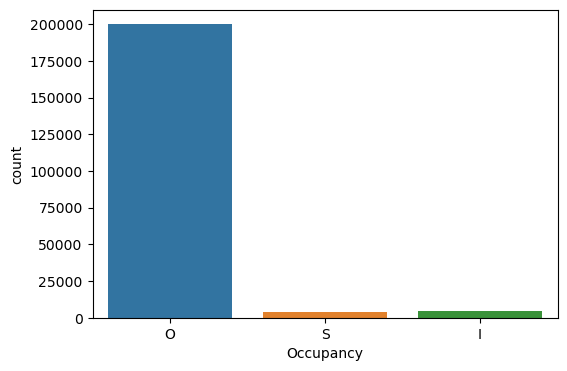

In [405]:
plt.figure(figsize=(6,4))
sns.countplot(x='Occupancy' , data=df)
plt.xlabel('Occupancy')
plt.show()

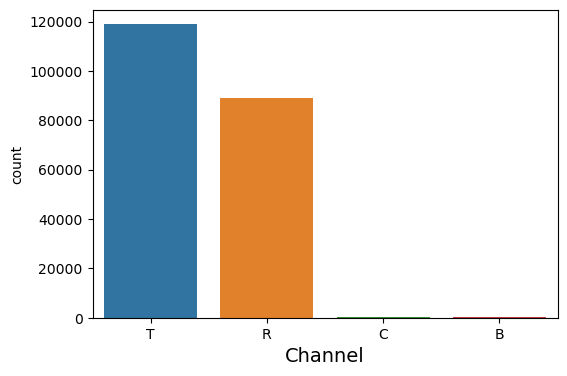

In [406]:
plt.figure(figsize=(6,4))
sns.countplot(x='Channel' , data=df)
plt.xlabel('Channel', fontsize=14)
plt.show()

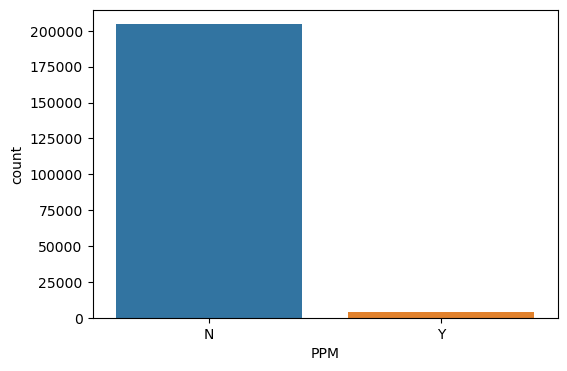

In [407]:
plt.figure(figsize=(6,4))
sns.countplot(x='PPM' , data=df)
plt.xlabel('PPM')
plt.show()

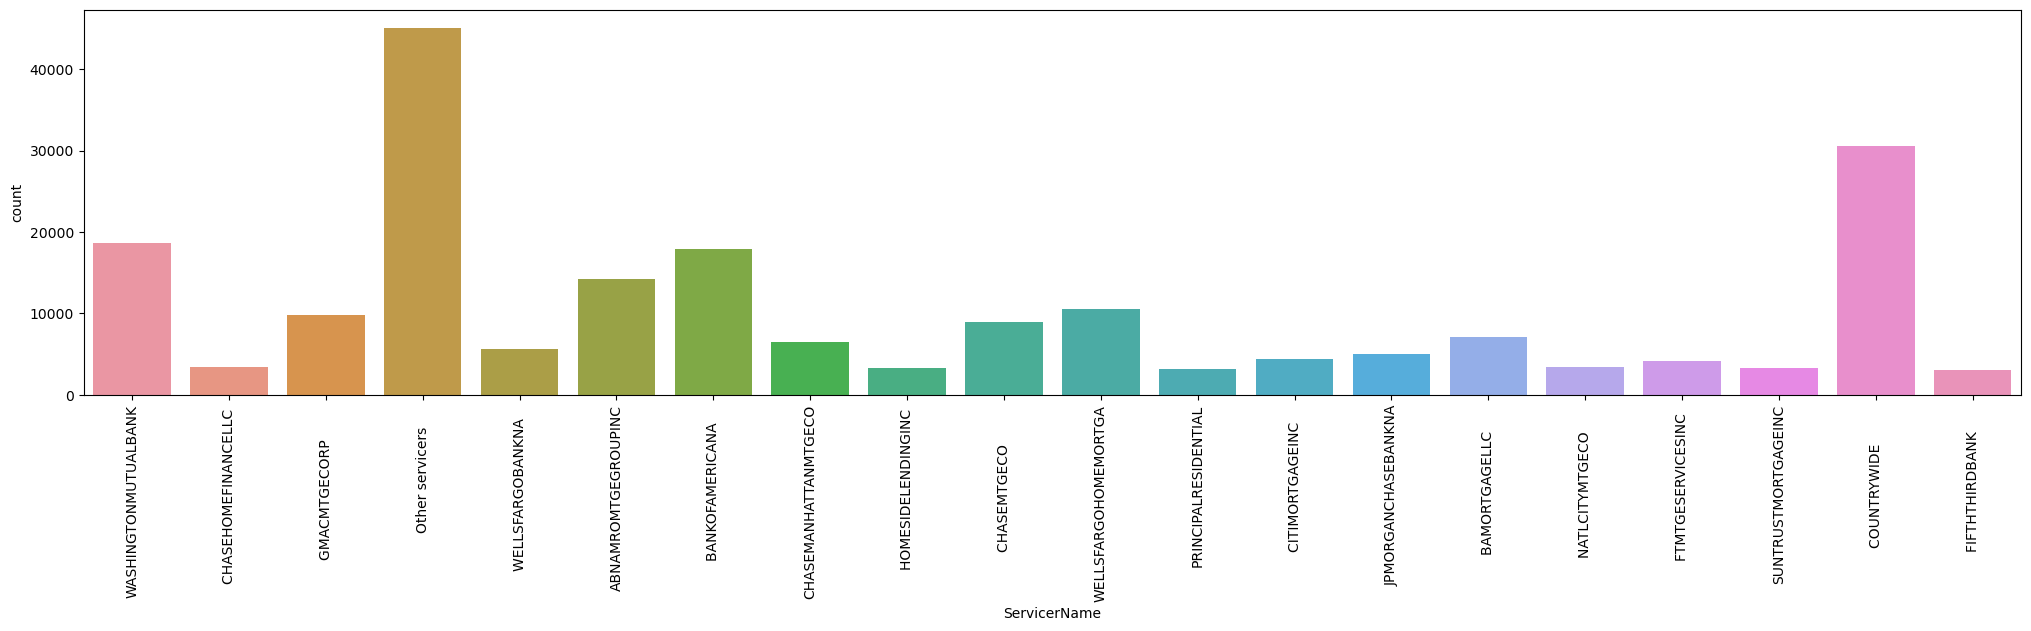

In [408]:
plt.figure(figsize=(25,5))
sns.countplot(x='ServicerName', data=df)
plt.xlabel('ServicerName')
plt.xticks(rotation='vertical')
plt.show()

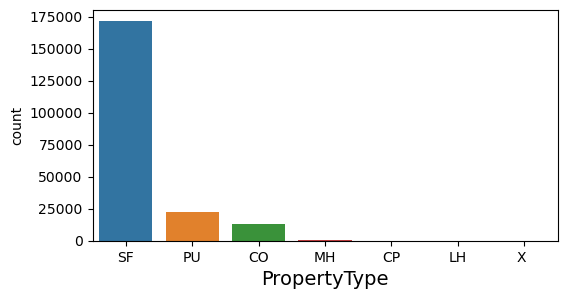

In [409]:
plt.figure(figsize=(6,3))
sns.countplot(x='PropertyType' , data=df)
plt.xlabel('PropertyType', fontsize=14)
plt.show()

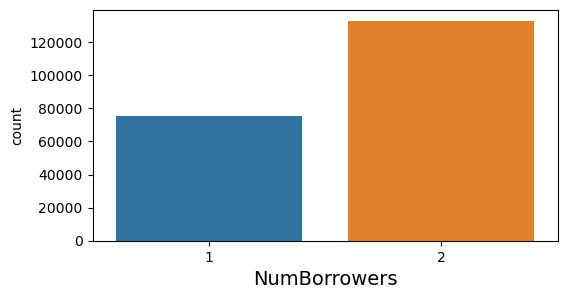

In [410]:
plt.figure(figsize=(6,3))
sns.countplot(x='NumBorrowers' , data=df)
plt.xlabel('NumBorrowers', fontsize=14)
plt.show()

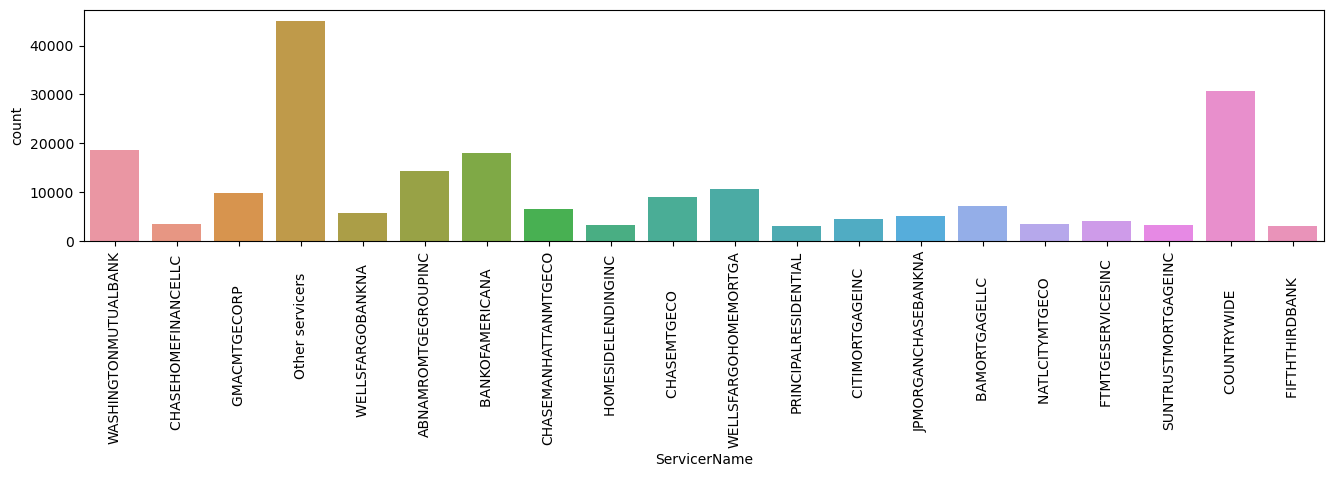

In [411]:
plt.figure(figsize=(16,3))
sns.countplot(x='ServicerName', data=df)
plt.xlabel('ServicerName')
plt.xticks(rotation='vertical')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


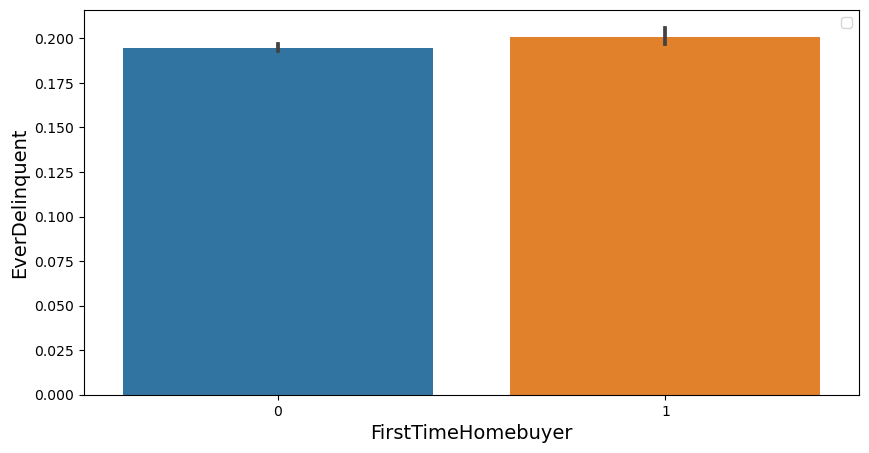

In [412]:
plt.figure(figsize=(10,5))
sns.barplot(x='aFirstTimeHomebuyer' ,y='EverDelinquent', data=df)
plt.xlabel('FirstTimeHomebuyer', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.show()

In [413]:
df.drop(['PostalCode','LoanSeqNum',"ProductType"],axis=1, inplace=True)

In [414]:
df.columns

Index(['MSA', 'Units', 'Occupancy', 'OCLTV', 'OrigUPB', 'OrigInterestRate',
       'Channel', 'PPM', 'PropertyState', 'PropertyType', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'aFirstTimeHomebuyer',
       'LTV_Range', 'DTI_Range', 'CreditRange', 'MIP_Range', 'RepPayRange',
       'Month_Difference', 'monthly_payment', 'total_payment',
       'interest_amount', 'monthly_income', 'monthly_rate',
       'monthly_priciple amount', 'principal_amount_remaining',
       'priciple_amount_paid', 'prepayment'],
      dtype='object')

In [415]:
encoder=LabelEncoder()

In [416]:
df['PPM']= encoder.fit_transform(df['PPM'])
df['LoanPurpose']= encoder.fit_transform(df['LoanPurpose'])
df['PropertyState']= encoder.fit_transform(df['PropertyState'])
df['ServicerName']= encoder.fit_transform(df['ServicerName'])
df['PropertyType']= encoder.fit_transform(df['PropertyType'])
df['Channel']= encoder.fit_transform(df['Channel'])
df['SellerName']= encoder.fit_transform(df['SellerName'])
df['LTV_Range']= encoder.fit_transform(df['LTV_Range'])
df['DTI_Range']= encoder.fit_transform(df['DTI_Range'])
df['CreditRange']= encoder.fit_transform(df['CreditRange'])
df['MIP_Range']= encoder.fit_transform(df['MIP_Range'])
df['RepPayRange']= encoder.fit_transform(df['RepPayRange'])
df['Month_Difference']= encoder.fit_transform(df['Month_Difference'])

In [417]:
df_city = pd.get_dummies(df['Occupancy'],drop_first = True)

In [418]:
df=pd.concat([df,df_city],axis=1)

In [419]:
df.drop('Occupancy',axis=1,inplace=True)

In [420]:
df.head()

,MSA,Units,OCLTV,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,...,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment,O,S
0,16974.0,1,89,117000,6.750,3,0,15,5,2,...,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36,1,0
1,19740.0,1,73,109000,6.500,2,0,5,5,1,...,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20,1,0
2,29940.0,1,75,88000,6.875,3,0,17,5,1,...,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60,1,0
3,31084.0,1,76,160000,6.875,2,0,4,5,1,...,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84,1,0
4,35644.0,1,78,109000,7.125,2,0,32,5,1,...,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60,1,0


In [421]:
df.isnull().sum()

MSA                           0
Units                         0
OCLTV                         0
OrigUPB                       0
OrigInterestRate              0
Channel                       0
PPM                           0
PropertyState                 0
PropertyType                  0
LoanPurpose                   0
OrigLoanTerm                  0
NumBorrowers                  0
SellerName                    0
ServicerName                  0
EverDelinquent                0
MonthsDelinquent              0
aFirstTimeHomebuyer           0
LTV_Range                     0
DTI_Range                     0
CreditRange                   0
MIP_Range                     0
RepPayRange                   0
Month_Difference              0
monthly_payment               0
total_payment                 0
interest_amount               0
monthly_income                0
monthly_rate                  0
monthly_priciple amount       0
principal_amount_remaining    0
priciple_amount_paid          0
prepayme

In [422]:
df.dtypes

MSA                           float64
Units                           int64
OCLTV                           int64
OrigUPB                         int64
OrigInterestRate              float64
Channel                         int32
PPM                             int32
PropertyState                   int32
PropertyType                    int32
LoanPurpose                     int32
OrigLoanTerm                    int64
NumBorrowers                    int32
SellerName                      int32
ServicerName                    int32
EverDelinquent                  int64
MonthsDelinquent                int64
aFirstTimeHomebuyer             int64
LTV_Range                       int32
DTI_Range                       int32
CreditRange                     int32
MIP_Range                       int32
RepPayRange                     int32
Month_Difference                int64
monthly_payment               float64
total_payment                 float64
interest_amount               float64
monthly_inco

FEATURE ENGINEERING

In [423]:
has_infinite_values = np.isinf(df).any()

In [424]:
print(has_infinite_values)

MSA                           False
Units                         False
OCLTV                         False
OrigUPB                       False
OrigInterestRate              False
Channel                       False
PPM                           False
PropertyState                 False
PropertyType                  False
LoanPurpose                   False
OrigLoanTerm                  False
NumBorrowers                  False
SellerName                    False
ServicerName                  False
EverDelinquent                False
MonthsDelinquent              False
aFirstTimeHomebuyer           False
LTV_Range                     False
DTI_Range                     False
CreditRange                   False
MIP_Range                     False
RepPayRange                   False
Month_Difference              False
monthly_payment               False
total_payment                 False
interest_amount               False
monthly_income                 True
monthly_rate                

In [425]:
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)] 

In [426]:
x = df.drop("prepayment", axis=1)
y=df["prepayment"]

In [427]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 1)